In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import Birch
import sweetviz

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from dmba import classificationSummary

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
stars = pd.read_csv('stars_training.csv')

In [36]:
stars.head()

,location_id,teff,logg,[C/M],[CI/M],[N/M],[O/M],[Na/H],[Mg/M],[Al/H],...,[Co/H],[Ni/H],[Cu/H],[Ge/H],[Ce/H],[Rb/H],[Y/H],[Nd/H],meandist,mass
0,4410.0,4790.0,2.53,-0.115,-0.118,0.5020,-0.0682,0.1070,0.0349,0.09150,...,0.1440,0.0441,-10000.0,-10000.0,-10000.0,-0.14300,-10000.0,-10000.0,1.060,1.80
1,4410.0,4790.0,2.38,0.159,0.199,0.0756,0.1890,0.0905,0.2240,0.17400,...,0.1220,0.0459,-10000.0,-10000.0,-10000.0,0.00916,-10000.0,-10000.0,1.710,0.88
2,4410.0,4910.0,2.63,-0.238,-0.305,0.4610,-0.1130,-0.0420,-0.0546,-0.03600,...,0.0159,-0.0108,-10000.0,-10000.0,-10000.0,0.14700,-10000.0,-10000.0,0.623,1.95
3,4470.0,4980.0,2.72,-0.588,-0.612,0.6090,-0.0662,0.0567,0.0480,-0.00983,...,-0.3860,-0.0113,-10000.0,-10000.0,-10000.0,0.21100,-10000.0,-10000.0,1.390,1.34
4,4410.0,4910.0,2.60,-0.161,-0.206,0.2110,-0.0738,-2.3800,-0.0266,-0.10200,...,-0.1070,-0.0590,-10000.0,-10000.0,-10000.0,0.03770,-10000.0,-10000.0,1.050,2.56


In [77]:
stars.shape

(1000, 31)

In [37]:
#No Null values
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  1000 non-null   float64
 1   teff         1000 non-null   float64
 2   logg         1000 non-null   float64
 3   [C/M]        1000 non-null   float64
 4   [CI/M]       1000 non-null   float64
 5   [N/M]        1000 non-null   float64
 6   [O/M]        1000 non-null   float64
 7   [Na/H]       1000 non-null   float64
 8   [Mg/M]       1000 non-null   float64
 9   [Al/H]       1000 non-null   float64
 10  [Si/M]       1000 non-null   float64
 11  [P/H]        1000 non-null   float64
 12  [S/M]        1000 non-null   float64
 13  [K/H]        1000 non-null   float64
 14  [Ca/M]       1000 non-null   float64
 15  [Ti/M]       1000 non-null   float64
 16  [TiII/M]     1000 non-null   float64
 17  [V/H]        1000 non-null   float64
 18  [Cr/H]       1000 non-null   float64
 19  [Mn/H] 

In [38]:
stars.describe()

,location_id,teff,logg,[C/M],[CI/M],[N/M],[O/M],[Na/H],[Mg/M],[Al/H],...,[Co/H],[Ni/H],[Cu/H],[Ge/H],[Ce/H],[Rb/H],[Y/H],[Nd/H],meandist,mass
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.000000,1000.0,1000.0,938.000000,1000.000000
mean,4471.870000,4791.97000,2.545080,-10.084092,-0.122365,0.305897,0.005536,-80.102653,0.061525,-9.927806,...,0.045784,0.024176,-10000.0,-10000.0,-10000.0,-0.041771,-10000.0,-10000.0,1.250534,1.439060
std,182.986029,126.12425,0.228096,316.225120,0.124939,0.121016,0.086364,891.278947,0.082463,316.230064,...,0.118876,0.034347,0.0,0.0,0.0,0.403811,0.0,0.0,0.438160,0.422301
min,4260.000000,4100.00000,1.470000,-10000.000000,-0.709000,-0.718000,-0.295000,-10000.000000,-0.063300,-10000.000000,...,-0.831000,-0.062800,-10000.0,-10000.0,-10000.0,-2.360000,-10000.0,-10000.0,0.208000,0.000000
25%,4400.000000,4710.00000,2.420000,-0.146000,-0.207000,0.240750,-0.044225,-0.093200,0.011000,0.017700,...,-0.010550,0.003598,-10000.0,-10000.0,-10000.0,-0.046750,-10000.0,-10000.0,0.927250,1.150000
50%,4410.000000,4810.00000,2.490000,-0.089950,-0.133000,0.306000,-0.016500,0.017700,0.038500,0.059250,...,0.054100,0.021700,-10000.0,-10000.0,-10000.0,0.036000,-10000.0,-10000.0,1.220000,1.390000
75%,4460.000000,4880.00000,2.612500,-0.026875,-0.058875,0.377000,0.024825,0.092625,0.078150,0.109000,...,0.117000,0.040325,-10000.0,-10000.0,-10000.0,0.109250,-10000.0,-10000.0,1.530000,1.660000
max,5020.000000,5000.00000,3.410000,0.477000,0.586000,0.753000,0.661000,0.493000,0.355000,0.393000,...,0.610000,0.506000,-10000.0,-10000.0,-10000.0,1.740000,-10000.0,-10000.0,3.010000,3.260000


### Graphical Summary

location_id       AxesSubplot(0.125,0.799681;0.168478x0.0803191)
teff           AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
logg           AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
[C/M]          AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
[CI/M]            AxesSubplot(0.125,0.703298;0.168478x0.0803191)
[N/M]          AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
[O/M]          AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
[Na/H]         AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
[Mg/M]            AxesSubplot(0.125,0.606915;0.168478x0.0803191)
[Al/H]         AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
[Si/M]         AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
[P/H]          AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
[S/M]             AxesSubplot(0.125,0.510532;0.168478x0.0803191)
[K/H]          AxesSubplot(0.327174,0.510532;0.168478x0.0803191)
[Ca/M]         AxesSubplot(0.529348,0.510532;0.168478x0.0803191)
[Ti/M]         AxesSubplo

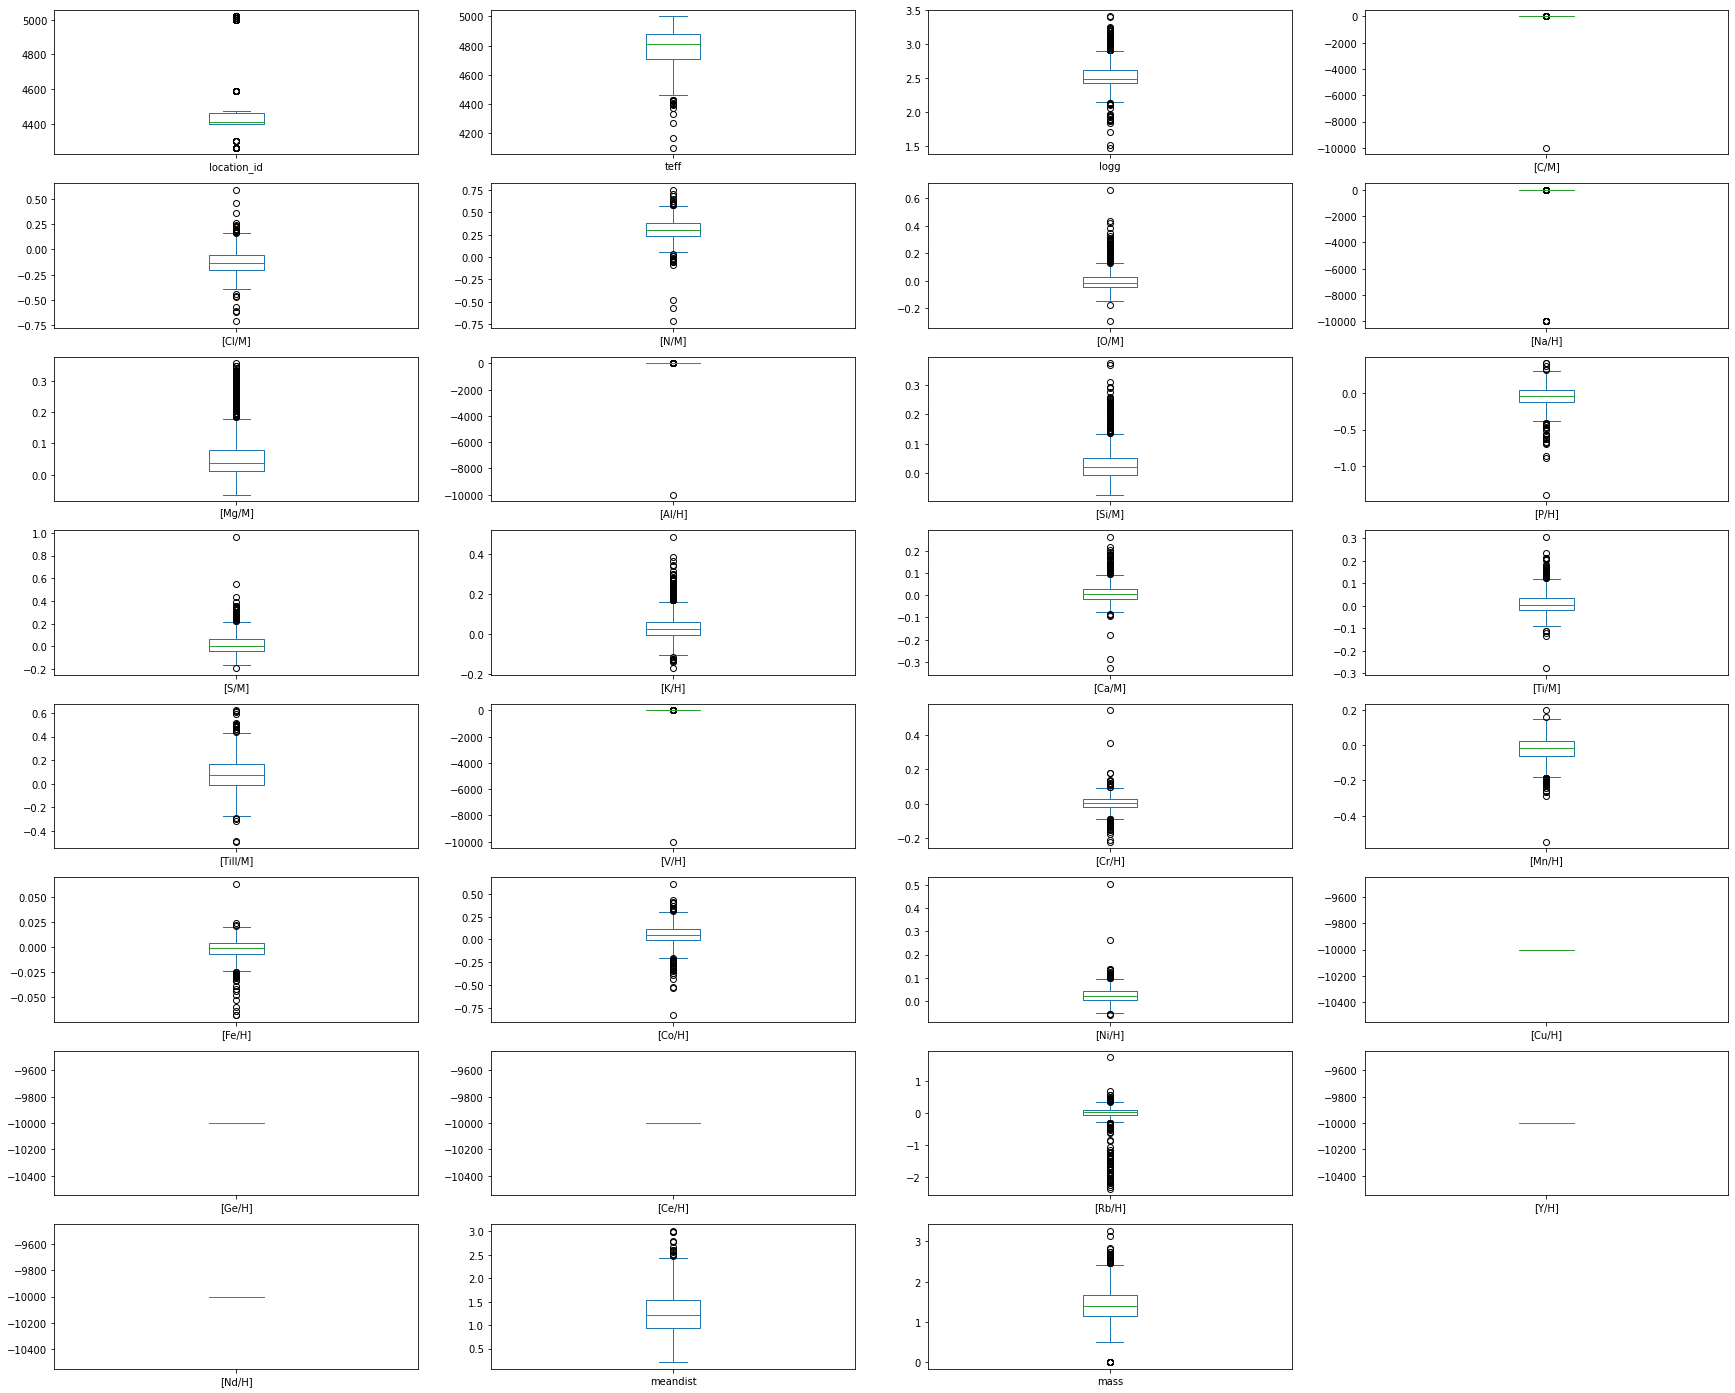

In [128]:
#Box Plots
stars.plot(figsize=(30,25), kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False)

C:\Users\ritvi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == -10000.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ritvi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == -10000.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ritvi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == -10000.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='location_id', ylabel='location_id'>,
        <AxesSubplot:xlabel='teff', ylabel='location_id'>,
        <AxesSubplot:xlabel='logg', ylabel='location_id'>,
        <AxesSubplot:xlabel='[C/M]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[CI/M]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[N/M]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[O/M]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[Na/H]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[Mg/M]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[Al/H]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[Si/M]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[P/H]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[S/M]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[K/H]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[Ca/M]', ylabel='location_id'>,
        <AxesSubplot:xlabel='[Ti/M]', ylabel='location_id'>,
        <AxesSubplot:xlabel='

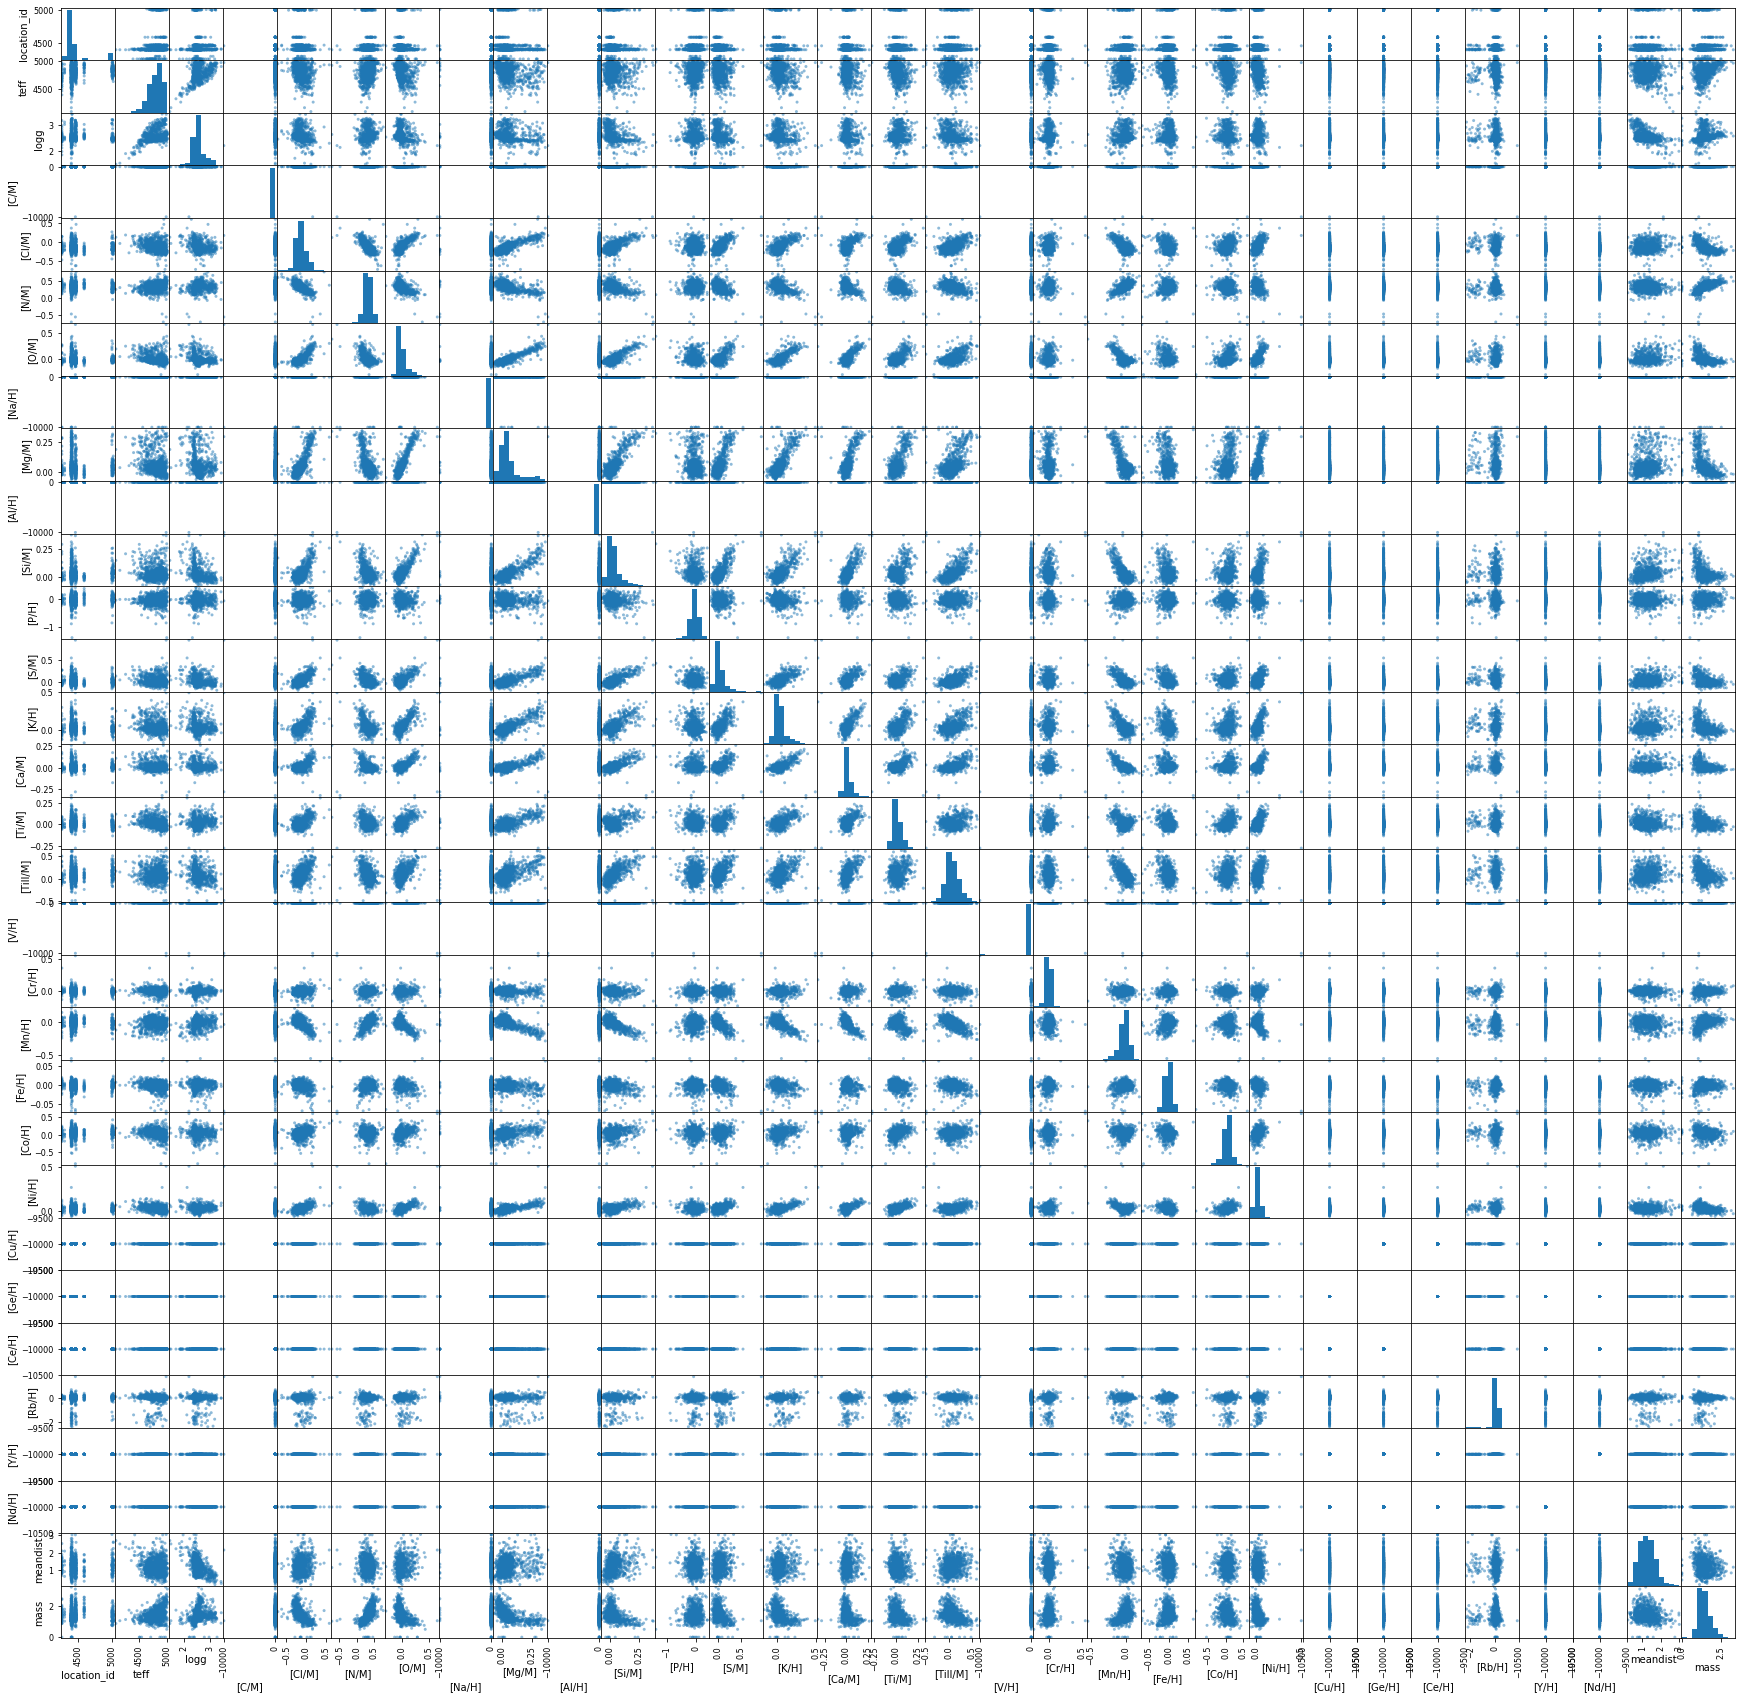

In [129]:
pd.plotting.scatter_matrix(stars, alpha=0.5, figsize=(30,30))

In [130]:
ns=stars.copy(deep=True)

ns.columns
#'location_id', 'teff', 'logg', '[C/M]', '[CI/M]', '[N/M]', '[O/M]',
#        '[Na/H]', '[Mg/M]', '[Al/H]', '[Si/M]', '[P/H]', '[S/M]', '[K/H]',
#        '[Ca/M]', '[Ti/M]', '[TiII/M]', '[V/H]', '[Cr/H]', '[Mn/H]', '[Fe/H]',
#        '[Co/H]', '[Ni/H]', '[Cu/H]', '[Ge/H]', '[Ce/H]', '[Rb/H]', '[Y/H]',
#        '[Nd/H]', 'meandist', 'mass'

Index(['location_id', 'teff', 'logg', '[C/M]', '[CI/M]', '[N/M]', '[O/M]',
       '[Na/H]', '[Mg/M]', '[Al/H]', '[Si/M]', '[P/H]', '[S/M]', '[K/H]',
       '[Ca/M]', '[Ti/M]', '[TiII/M]', '[V/H]', '[Cr/H]', '[Mn/H]', '[Fe/H]',
       '[Co/H]', '[Ni/H]', '[Cu/H]', '[Ge/H]', '[Ce/H]', '[Rb/H]', '[Y/H]',
       '[Nd/H]', 'meandist', 'mass'],
      dtype='object')

In [131]:
ns['meandist'].fillna(ns['meandist'].mean(), inplace = True)

In [132]:
ns.drop(['[Cu/H]','[Ge/H]','[Ce/H]','[Y/H]', '[Nd/H]'], axis=1, inplace=True)
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  1000 non-null   float64
 1   teff         1000 non-null   float64
 2   logg         1000 non-null   float64
 3   [C/M]        1000 non-null   float64
 4   [CI/M]       1000 non-null   float64
 5   [N/M]        1000 non-null   float64
 6   [O/M]        1000 non-null   float64
 7   [Na/H]       1000 non-null   float64
 8   [Mg/M]       1000 non-null   float64
 9   [Al/H]       1000 non-null   float64
 10  [Si/M]       1000 non-null   float64
 11  [P/H]        1000 non-null   float64
 12  [S/M]        1000 non-null   float64
 13  [K/H]        1000 non-null   float64
 14  [Ca/M]       1000 non-null   float64
 15  [Ti/M]       1000 non-null   float64
 16  [TiII/M]     1000 non-null   float64
 17  [V/H]        1000 non-null   float64
 18  [Cr/H]       1000 non-null   float64
 19  [Mn/H] 

In [133]:
ns['[C/M]'].value_counts().sort_index()

-10000.000    1
-0.658        1
-0.588        1
-0.533        1
-0.483        1
             ..
 0.164        1
 0.165        1
 0.235        1
 0.417        1
 0.477        1
Name: [C/M], Length: 586, dtype: int64

In [134]:
ns['[Na/H]'].value_counts().sort_index()

-10000.000    8
-2.710        1
-2.590        1
-2.570        1
-2.530        1
             ..
 0.396        1
 0.461        1
 0.480        1
 0.491        1
 0.493        1
Name: [Na/H], Length: 778, dtype: int64

In [135]:
ns['[Al/H]'].value_counts().sort_index()


-10000.000    1
-0.330        1
-0.167        1
-0.158        1
-0.157        1
             ..
 0.364        1
 0.365        1
 0.367        1
 0.368        1
 0.393        1
Name: [Al/H], Length: 742, dtype: int64

In [136]:
# ns['[Ge/H]'].value_counts().sort_index()

In [137]:
ns['[V/H]'].value_counts().sort_index()

-10000.000    1
-2.080        1
-1.420        1
-1.210        1
-1.160        1
             ..
 0.264        1
 0.311        1
 0.325        1
 0.360        1
 0.441        1
Name: [V/H], Length: 802, dtype: int64

In [138]:
# ns[(ns['[C/M]']<=-10000.000)]

In [139]:
index_names = ns[(ns['[C/M]']==-10000.000) | (ns['[Na/H]']==-10000.000)| (ns['[Al/H]']==-10000.000)| (ns['[V/H]']==-10000.000)].index
index_names

Int64Index([56, 171, 373, 417, 541, 644, 658, 713], dtype='int64')

In [140]:
ns.drop(index_names, inplace = True)

In [141]:
ns.shape

(992, 26)

In [142]:
#Numerical correlations
ns.corr()

,location_id,teff,logg,[C/M],[CI/M],[N/M],[O/M],[Na/H],[Mg/M],[Al/H],...,[TiII/M],[V/H],[Cr/H],[Mn/H],[Fe/H],[Co/H],[Ni/H],[Rb/H],meandist,mass
location_id,1.000000,0.165192,-0.012553,-0.042902,-0.033857,0.014409,-0.043834,0.014610,-0.049969,0.048031,...,0.090627,-0.053904,-0.040356,0.007075,0.042527,0.041164,-0.013278,0.002255,-0.004222,0.013272
teff,0.165192,1.000000,0.433767,-0.439021,-0.287710,0.213467,-0.299193,-0.004882,-0.262308,-0.223335,...,0.037807,-0.067162,-0.140266,0.068197,-0.245747,-0.287985,-0.329465,0.020717,-0.135679,0.371392
logg,-0.012553,0.433767,1.000000,-0.232159,-0.248067,0.142858,-0.252606,0.027271,-0.173342,-0.211291,...,-0.276563,0.080735,-0.001186,0.199817,0.000841,-0.074957,0.036092,-0.023719,-0.542322,0.221489
[C/M],-0.042902,-0.439021,-0.232159,1.000000,0.888578,-0.608358,0.628640,-0.021192,0.632676,0.521082,...,0.254419,-0.020652,0.027185,-0.392752,-0.254795,0.315134,0.510227,-0.125845,0.112050,-0.564365
[CI/M],-0.033857,-0.287710,-0.248067,0.888578,1.000000,-0.641510,0.724732,-0.077629,0.751717,0.625365,...,0.461318,-0.043674,0.040419,-0.618860,-0.322453,0.213741,0.563274,-0.126041,0.164905,-0.564489
[N/M],0.014409,0.213467,0.142858,-0.608358,-0.641510,1.000000,-0.523286,0.166650,-0.576509,-0.432959,...,-0.417025,0.079860,0.103771,0.673964,0.144063,-0.107046,-0.308032,0.115606,-0.082119,0.618029
[O/M],-0.043834,-0.299193,-0.252606,0.628640,0.724732,-0.523286,1.000000,-0.088592,0.883543,0.762433,...,0.537667,-0.042725,-0.044396,-0.679394,-0.216091,0.274732,0.592627,-0.119847,0.205864,-0.472398
[Na/H],0.014610,-0.004882,0.027271,-0.021192,-0.077629,0.166650,-0.088592,1.000000,-0.117819,-0.061791,...,-0.116435,0.156001,0.038387,0.203503,-0.026357,0.077604,-0.020147,0.036536,-0.039315,0.096242
[Mg/M],-0.049969,-0.262308,-0.173342,0.632676,0.751717,-0.576509,0.883543,-0.117819,1.000000,0.821021,...,0.588033,-0.137730,-0.082889,-0.738281,-0.293111,0.275620,0.658876,-0.145464,0.169269,-0.550171
[Al/H],0.048031,-0.223335,-0.211291,0.521082,0.625365,-0.432959,0.762433,-0.061791,0.821021,1.000000,...,0.569476,-0.072315,-0.008312,-0.606597,-0.162291,0.366434,0.623929,-0.055664,0.154250,-0.454084


<AxesSubplot:>

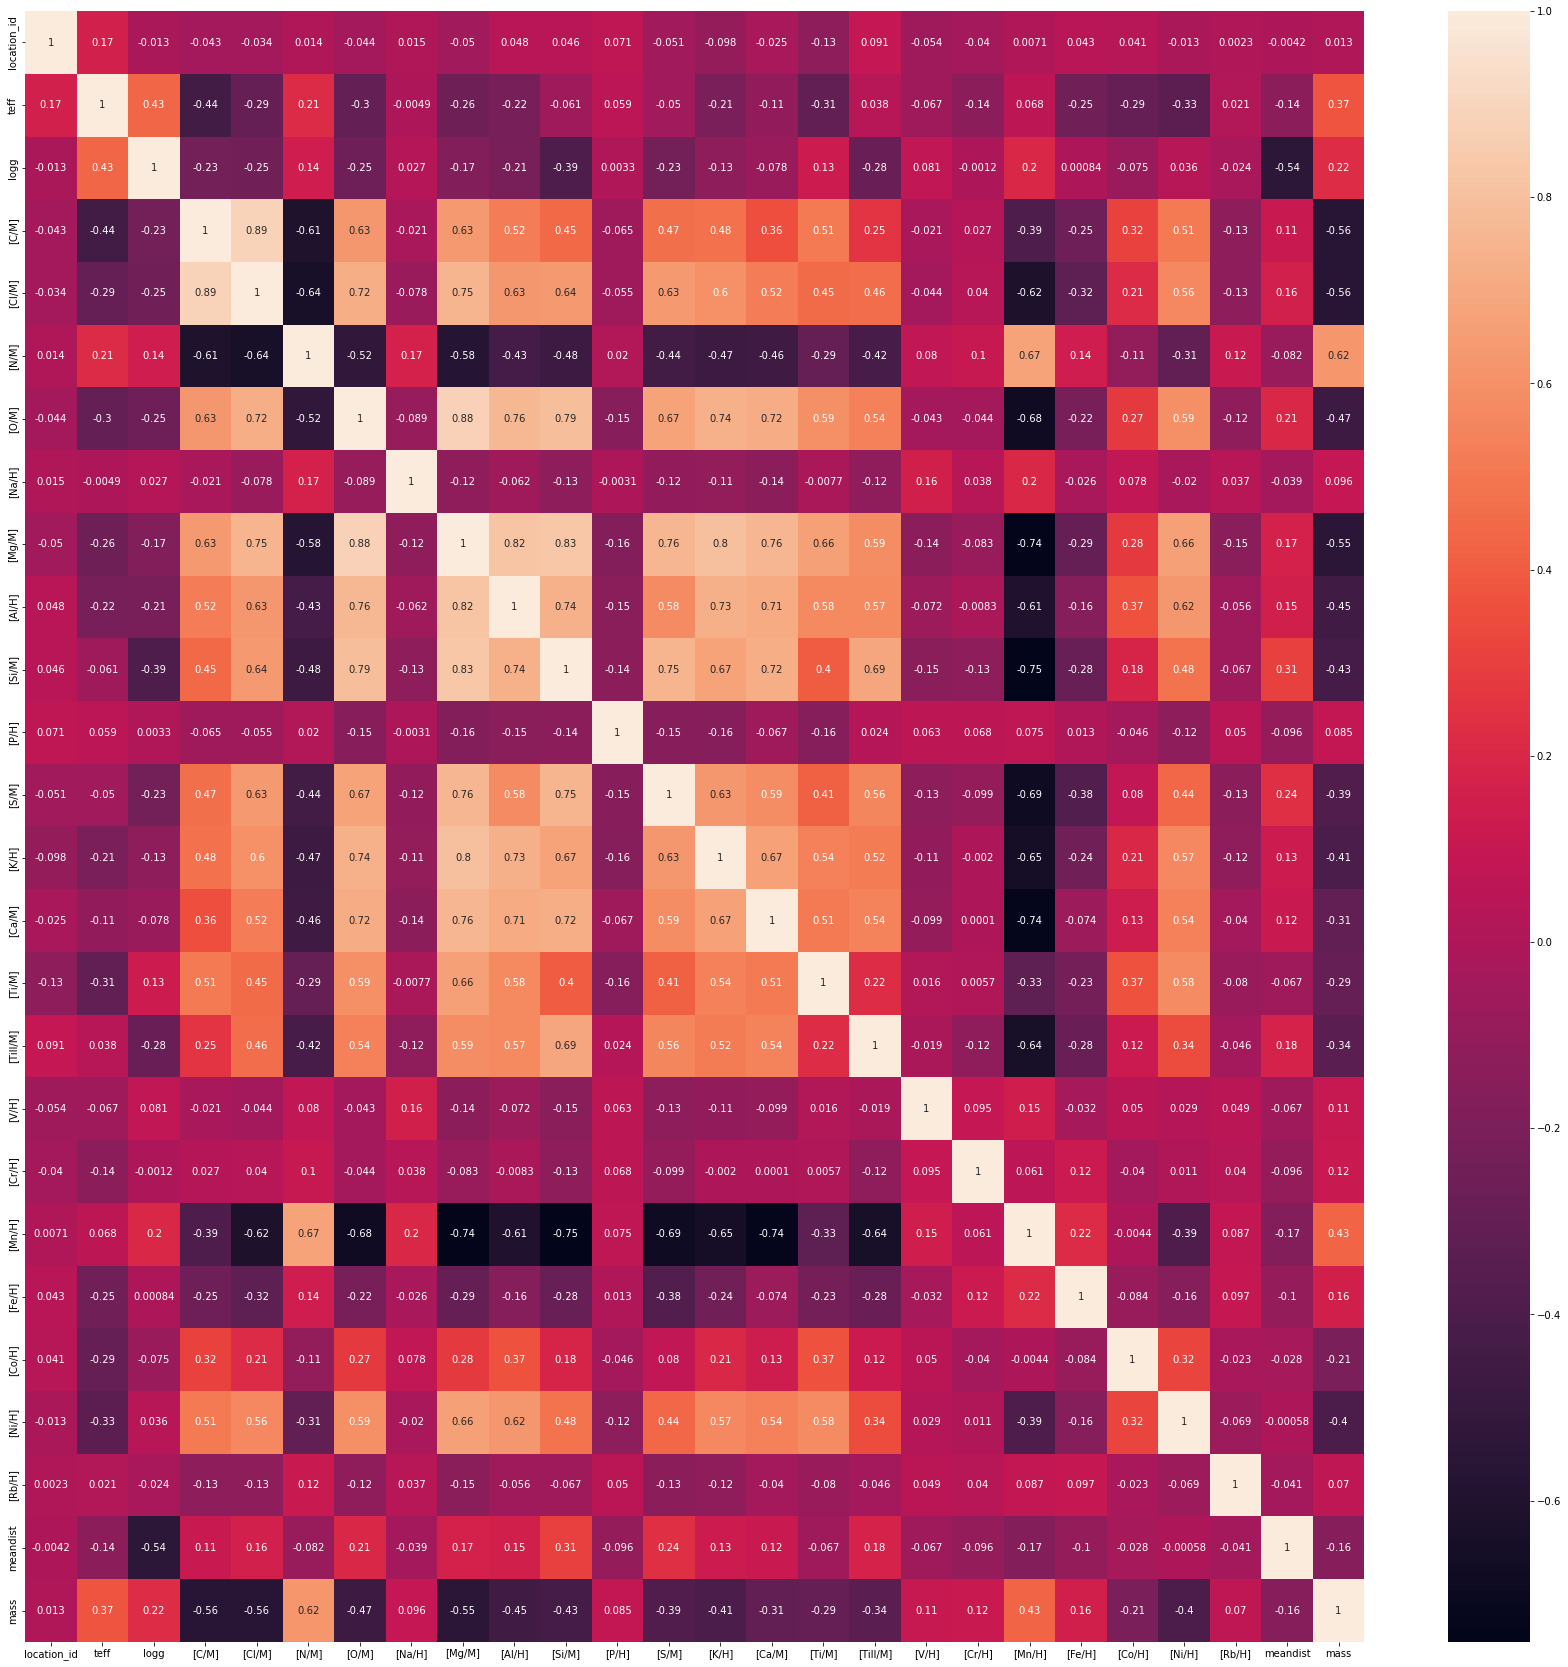

In [143]:
plt.figure(figsize=(30, 30))
sns.heatmap(ns.corr(), annot=True) 

In [144]:
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
dfCorr = ns.corr()
filteredDf = dfCorr[((dfCorr >= .6) | (dfCorr <= -.6)) & (dfCorr !=1.000)]

high_cor=pd.DataFrame(filteredDf.abs().unstack().sort_values(ascending=False).drop_duplicates())
high_cor

0
[C/M]       [CI/M]       0.888578
[O/M]       [Mg/M]       0.883543
[Si/M]      [Mg/M]       0.833333
[Al/H]      [Mg/M]       0.821021
[K/H]       [Mg/M]       0.799008
[Si/M]      [O/M]        0.789635
[O/M]       [Al/H]       0.762433
[Mg/M]      [Ca/M]       0.759225
            [S/M]        0.758575
[CI/M]      [Mg/M]       0.751717
[Si/M]      [Mn/H]       0.751688
[S/M]       [Si/M]       0.751011
[Si/M]      [Al/H]       0.739740
[Mg/M]      [Mn/H]       0.738281
[O/M]       [K/H]        0.737412
[Mn/H]      [Ca/M]       0.737095
[K/H]       [Al/H]       0.731122
[O/M]       [CI/M]       0.724732
[Si/M]      [Ca/M]       0.721784
[O/M]       [Ca/M]       0.715975
[Ca/M]      [Al/H]       0.707951
[Si/M]      [TiII/M]     0.686941
[Mn/H]      [S/M]        0.685497
            [O/M]        0.679394
[N/M]       [Mn/H]       0.673964
[O/M]       [S/M]        0.673713
[Si/M]      [K/H]        0.673429
[Ca/M]      [K/H]        0.671065
[Mg/M]      [Ti/M]       0.663943
            [Ni/H]       0.658876
[Mn/H]      [K/H]        0.649451
[N/M]       [CI/M]       0.641510
[TiII/M]    [Mn/H]       0.636497
[Si/M]      [CI/M]       0.635361
[Mg/M]      [C/M]        0.632676
[S/M]       [CI/M]       0.631268
[K/H]       [S/M]        0.629670
[C/M]       [O/M]        0.628640
[Al/H]      [CI/M]       0.625365
[Ni/H]      [Al/H]       0.623929
[Mn/H]      [CI/M]       0.618860
[N/M]       mass         0.618029
            [C/M]        0.608358
[Mn/H]      [Al/H]       0.606597
location_id location_id       NaN

In [145]:
ns.drop(columns=['[C/M]', '[O/M]', '[Si/M]', '[Al/H]', '[K/H]', '[Mg/M]', '[S/M]', '[CI/M]', '[Ca/M]', '[N/M]', '[Ni/H]', '[TiII/M]'], axis=1, inplace=True)

In [146]:
ns.corr()

,location_id,teff,logg,[Na/H],[P/H],[Ti/M],[V/H],[Cr/H],[Mn/H],[Fe/H],[Co/H],[Rb/H],meandist,mass
location_id,1.000000,0.165192,-0.012553,0.014610,0.070527,-0.125804,-0.053904,-0.040356,0.007075,0.042527,0.041164,0.002255,-0.004222,0.013272
teff,0.165192,1.000000,0.433767,-0.004882,0.059097,-0.307897,-0.067162,-0.140266,0.068197,-0.245747,-0.287985,0.020717,-0.135679,0.371392
logg,-0.012553,0.433767,1.000000,0.027271,0.003329,0.129397,0.080735,-0.001186,0.199817,0.000841,-0.074957,-0.023719,-0.542322,0.221489
[Na/H],0.014610,-0.004882,0.027271,1.000000,-0.003084,-0.007687,0.156001,0.038387,0.203503,-0.026357,0.077604,0.036536,-0.039315,0.096242
[P/H],0.070527,0.059097,0.003329,-0.003084,1.000000,-0.158699,0.063478,0.068473,0.075102,0.012521,-0.045785,0.050177,-0.096353,0.084765
[Ti/M],-0.125804,-0.307897,0.129397,-0.007687,-0.158699,1.000000,0.015946,0.005716,-0.325458,-0.228060,0.369230,-0.080167,-0.066615,-0.290695
[V/H],-0.053904,-0.067162,0.080735,0.156001,0.063478,0.015946,1.000000,0.095455,0.147450,-0.031845,0.049893,0.048949,-0.067344,0.105240
[Cr/H],-0.040356,-0.140266,-0.001186,0.038387,0.068473,0.005716,0.095455,1.000000,0.060794,0.122475,-0.039824,0.039790,-0.096111,0.115932
[Mn/H],0.007075,0.068197,0.199817,0.203503,0.075102,-0.325458,0.147450,0.060794,1.000000,0.215030,-0.004412,0.087133,-0.167201,0.431878
[Fe/H],0.042527,-0.245747,0.000841,-0.026357,0.012521,-0.228060,-0.031845,0.122475,0.215030,1.000000,-0.083824,0.097335,-0.101110,0.156440


<AxesSubplot:>

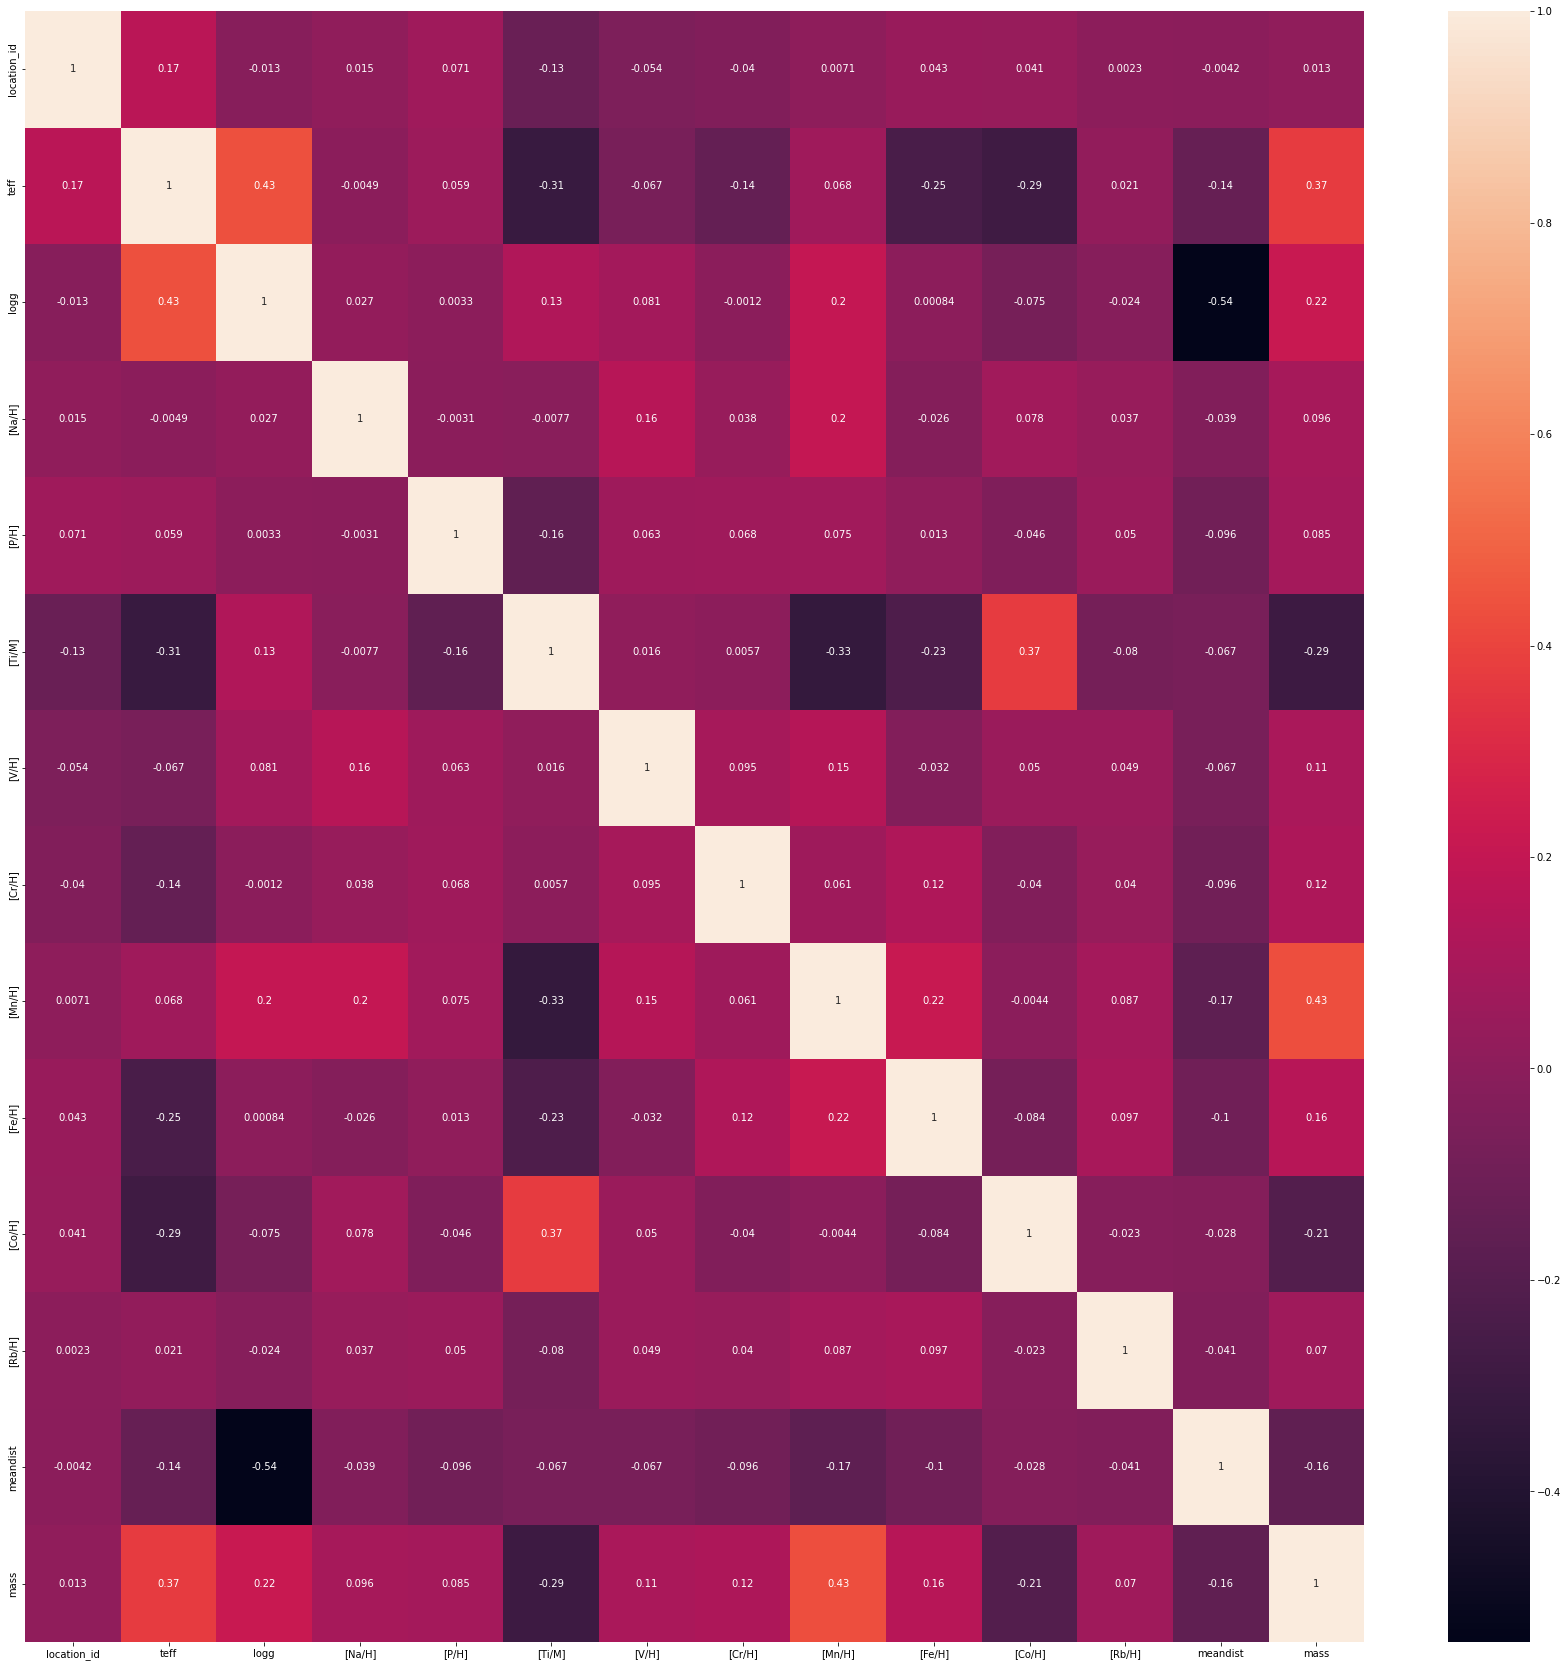

In [147]:
plt.figure(figsize=(30, 30))
sns.heatmap(ns.corr(), annot=True) 

In [148]:
ns.drop(columns=['location_id'],axis=1, inplace=True)
ns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   teff      992 non-null    float64
 1   logg      992 non-null    float64
 2   [Na/H]    992 non-null    float64
 3   [P/H]     992 non-null    float64
 4   [Ti/M]    992 non-null    float64
 5   [V/H]     992 non-null    float64
 6   [Cr/H]    992 non-null    float64
 7   [Mn/H]    992 non-null    float64
 8   [Fe/H]    992 non-null    float64
 9   [Co/H]    992 non-null    float64
 10  [Rb/H]    992 non-null    float64
 11  meandist  992 non-null    float64
 12  mass      992 non-null    float64
dtypes: float64(13)
memory usage: 108.5 KB


In [149]:
from sklearn.tree import DecisionTreeRegressor

In [150]:
X = ns.drop(['mass'], axis = 1)
y = ns['mass']
X.head()

,teff,logg,[Na/H],[P/H],[Ti/M],[V/H],[Cr/H],[Mn/H],[Fe/H],[Co/H],[Rb/H],meandist
0,4790.0,2.53,0.1070,-0.216,-0.00877,-0.0179,0.0317,0.07160,-0.01190,0.1440,-0.14300,1.060
1,4790.0,2.38,0.0905,-0.358,0.06810,-0.1770,0.0351,-0.15600,-0.02610,0.1220,0.00916,1.710
2,4910.0,2.63,-0.0420,-0.437,-0.05100,-0.0153,-0.0101,0.00456,-0.01110,0.0159,0.14700,0.623
3,4980.0,2.72,0.0567,-0.240,-0.01530,0.1720,-0.0808,-0.04140,-0.00430,-0.3860,0.21100,1.390
4,4910.0,2.60,-2.3800,-0.131,-0.03930,-0.0915,0.0661,-0.07970,0.00403,-0.1070,0.03770,1.050


In [151]:
y.head()

0    1.80
1    0.88
2    1.95
3    1.34
4    2.56
Name: mass, dtype: float64

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [153]:
X_train

,teff,logg,[Na/H],[P/H],[Ti/M],[V/H],[Cr/H],[Mn/H],[Fe/H],[Co/H],[Rb/H],meandist
207,4890.0,2.40,0.0586,-0.0934,-0.063300,0.0108,-0.004840,-0.0277,-0.00338,-0.00297,-0.01970,1.580000
355,4710.0,2.54,-1.7900,-0.0788,0.021400,0.0163,0.038400,-0.0553,0.01560,0.07900,0.01090,1.400000
607,4680.0,2.70,0.3510,0.0489,0.015200,0.0757,0.020400,0.0949,0.00823,0.16400,-0.06560,1.190000
289,4840.0,2.53,0.0852,0.0128,0.034400,0.0436,-0.000968,0.0912,-0.00685,0.02080,0.02860,1.170000
989,4500.0,2.40,-0.3450,-0.0845,0.000369,-0.0331,0.043400,-0.0709,-0.00414,0.00367,0.11700,1.360000
...,...,...,...,...,...,...,...,...,...,...,...,...
269,4670.0,2.38,-0.3100,0.0198,0.055800,0.0291,-0.005360,-0.0880,0.00233,0.11300,-2.08000,1.250534
997,4950.0,2.60,0.2120,0.1560,-0.079900,0.0177,-0.008360,0.0118,-0.01130,0.07970,-0.02710,1.470000
189,4760.0,2.38,0.1030,0.2180,-0.038500,-0.0712,0.040700,-0.0212,0.01390,-0.00476,0.12400,1.730000
533,4860.0,2.43,-1.4200,0.0521,0.031000,0.0309,-0.056600,-0.0291,0.00353,0.07480,0.00988,1.370000


In [154]:
fullClassTree = DecisionTreeRegressor(random_state=1)
fullClassTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [156]:
fullClassTree.score(X_test, y_test)
y_pred = fullClassTree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.40361743665986405

In [157]:
grid_param = {
'criterion': ['entropy','mse'],
'max_depth' : [2,4, 6,8, 10],
'min_samples_leaf' : [2,6,10],
'min_samples_split': [2,5,10],
}

In [159]:
fullClassTree_GSCV = DecisionTreeRegressor(random_state=1)
gstree = GridSearchCV(estimator=fullClassTree_GSCV,param_grid=grid_param,cv=5,n_jobs =-1)
gstree.fit(X_train,y_train)

best_parameters = gstree.best_params_
print(best_parameters)
print("best score: " + str(gstree.best_score_))

{'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
best score: 0.4384906046990881


C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 356, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'entropy'

  war

In [164]:
grid_param_new = {
# 'criterion': ['entropy','mse'],
'max_depth' : [6,8,10],
'min_samples_leaf' : [10, 15, 20],
'min_samples_split': [2,5,10],
}

In [166]:
newtree = DecisionTreeRegressor(random_state=1, criterion='mse')
newtree = GridSearchCV(estimator=fullClassTree_GSCV, param_grid=grid_param,cv=5,n_jobs =-1)
newtree.fit(X_train,y_train)

best_parameters = newtree.best_params_
print(best_parameters)
print("best score: " + str(newtree.best_score_))

{'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
best score: 0.4384906046990881


C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 356, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'entropy'

  war

In [204]:
newtree.score(X_test, y_test)
y_pred = newtree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.32318453750785203

In [179]:
stest = pd.read_csv('stars_test.csv')
stest.shape

(235, 30)

In [180]:
stest['meandist'].fillna(ns['meandist'].mean(), inplace = True)
stest.drop(['[Cu/H]','[Ge/H]','[Ce/H]','[Y/H]', '[Nd/H]'], axis=1, inplace=True)
index_names = stest[(stest['[C/M]']==-10000.000) | (stest['[Na/H]']==-10000.000)| (stest['[Al/H]']==-10000.000)| (stest['[V/H]']==-10000.000)].index
index_names

Int64Index([22, 108, 113, 166, 234], dtype='int64')

In [181]:
df=stest.copy(deep=True)
df.replace(-10000.000, np.NaN)

,location_id,teff,logg,[C/M],[CI/M],[N/M],[O/M],[Na/H],[Mg/M],[Al/H],...,[Ti/M],[TiII/M],[V/H],[Cr/H],[Mn/H],[Fe/H],[Co/H],[Ni/H],[Rb/H],meandist
0,4400.0,4900.0,2.67,-0.1190,-0.0811,0.393,0.10200,-0.00994,0.2040,0.27300,...,0.057200,0.5470,0.0723,0.07460,-0.1250,-0.01190,0.0976,0.06990,-0.0375,1.200
1,5000.0,4810.0,2.43,-0.1200,-0.2970,0.397,-0.00965,0.01340,0.0556,0.16300,...,0.061500,-0.0654,-0.5480,-0.01840,0.0267,0.00271,0.1150,0.03320,0.1110,1.770
2,4400.0,4750.0,2.47,-0.1690,-0.2190,0.373,-0.05520,0.06840,0.0138,0.01840,...,0.013200,-0.0469,-0.0733,0.00745,0.0168,0.00851,0.0999,0.02760,0.1170,0.691
3,4590.0,4870.0,3.24,-0.1390,-0.1760,0.508,-0.01910,0.16700,0.0443,0.02840,...,0.048300,-0.0823,0.0435,0.00271,0.1190,-0.00585,0.1120,0.06390,-0.0809,0.265
4,4400.0,4630.0,1.31,-0.5320,0.0204,0.566,0.35800,-0.65600,0.3280,-0.40700,...,-0.004430,-0.5350,0.3100,0.21600,-0.1520,0.01990,0.5360,0.06570,0.9310,3.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,4400.0,4910.0,2.84,-0.0877,-0.0355,0.182,-0.08150,0.01530,0.0739,0.08210,...,-0.030000,0.2610,-0.0423,0.00650,-0.1140,-0.01350,-0.0575,0.09540,0.0957,0.774
231,4400.0,4640.0,2.52,-0.0380,-0.1090,0.268,0.05000,-0.02570,0.0793,0.07390,...,0.047700,0.1100,0.0993,0.06120,-0.0345,0.00500,0.0849,0.05280,0.2210,0.973
232,4410.0,4870.0,2.90,-0.2210,-0.3440,0.398,-0.09460,-1.85000,0.0600,-0.00340,...,0.036900,0.0365,-0.1810,0.00662,0.0298,0.00717,0.1300,-0.00256,-0.1140,1.000
233,4460.0,4980.0,3.15,-0.1930,-0.2650,0.303,-0.05580,-0.08000,0.0179,0.00863,...,-0.000403,0.0842,-0.0625,-0.00788,-0.0110,-0.00519,-0.1860,0.05530,-0.0455,0.707


In [182]:
fill_nas=['[C/M]', '[Na/H]', '[Al/H]', '[V/H]']
for col in fill_nas:
    df[col].fillna(df[col].mean(), inplace = True)

In [183]:
df

,location_id,teff,logg,[C/M],[CI/M],[N/M],[O/M],[Na/H],[Mg/M],[Al/H],...,[Ti/M],[TiII/M],[V/H],[Cr/H],[Mn/H],[Fe/H],[Co/H],[Ni/H],[Rb/H],meandist
0,4400.0,4900.0,2.67,-0.1190,-0.0811,0.393,0.10200,-0.00994,0.2040,0.27300,...,0.057200,0.5470,0.0723,0.07460,-0.1250,-0.01190,0.0976,0.06990,-0.0375,1.200
1,5000.0,4810.0,2.43,-0.1200,-0.2970,0.397,-0.00965,0.01340,0.0556,0.16300,...,0.061500,-0.0654,-0.5480,-0.01840,0.0267,0.00271,0.1150,0.03320,0.1110,1.770
2,4400.0,4750.0,2.47,-0.1690,-0.2190,0.373,-0.05520,0.06840,0.0138,0.01840,...,0.013200,-0.0469,-0.0733,0.00745,0.0168,0.00851,0.0999,0.02760,0.1170,0.691
3,4590.0,4870.0,3.24,-0.1390,-0.1760,0.508,-0.01910,0.16700,0.0443,0.02840,...,0.048300,-0.0823,0.0435,0.00271,0.1190,-0.00585,0.1120,0.06390,-0.0809,0.265
4,4400.0,4630.0,1.31,-0.5320,0.0204,0.566,0.35800,-0.65600,0.3280,-0.40700,...,-0.004430,-0.5350,0.3100,0.21600,-0.1520,0.01990,0.5360,0.06570,0.9310,3.510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,4400.0,4910.0,2.84,-0.0877,-0.0355,0.182,-0.08150,0.01530,0.0739,0.08210,...,-0.030000,0.2610,-0.0423,0.00650,-0.1140,-0.01350,-0.0575,0.09540,0.0957,0.774
231,4400.0,4640.0,2.52,-0.0380,-0.1090,0.268,0.05000,-0.02570,0.0793,0.07390,...,0.047700,0.1100,0.0993,0.06120,-0.0345,0.00500,0.0849,0.05280,0.2210,0.973
232,4410.0,4870.0,2.90,-0.2210,-0.3440,0.398,-0.09460,-1.85000,0.0600,-0.00340,...,0.036900,0.0365,-0.1810,0.00662,0.0298,0.00717,0.1300,-0.00256,-0.1140,1.000
233,4460.0,4980.0,3.15,-0.1930,-0.2650,0.303,-0.05580,-0.08000,0.0179,0.00863,...,-0.000403,0.0842,-0.0625,-0.00788,-0.0110,-0.00519,-0.1860,0.05530,-0.0455,0.707


In [184]:
df.isnull().values.any()

False

In [186]:
df.drop(columns=['[C/M]', '[O/M]', '[Si/M]', '[Al/H]', '[K/H]', '[Mg/M]', '[S/M]', '[CI/M]', '[Ca/M]', '[N/M]', '[Ni/H]', '[TiII/M]'], axis=1, inplace=True)

In [187]:
df.shape

(235, 13)

In [189]:
testdata=df.drop(columns=['meandist'])
testdata.head()

,location_id,teff,logg,[Na/H],[P/H],[Ti/M],[V/H],[Cr/H],[Mn/H],[Fe/H],[Co/H],[Rb/H]
0,4400.0,4900.0,2.67,-0.00994,0.0923,0.05720,0.0723,0.07460,-0.1250,-0.01190,0.0976,-0.0375
1,5000.0,4810.0,2.43,0.01340,-0.2620,0.06150,-0.5480,-0.01840,0.0267,0.00271,0.1150,0.1110
2,4400.0,4750.0,2.47,0.06840,-0.0290,0.01320,-0.0733,0.00745,0.0168,0.00851,0.0999,0.1170
3,4590.0,4870.0,3.24,0.16700,-0.1400,0.04830,0.0435,0.00271,0.1190,-0.00585,0.1120,-0.0809
4,4400.0,4630.0,1.31,-0.65600,0.2280,-0.00443,0.3100,0.21600,-0.1520,0.01990,0.5360,0.9310


In [210]:
# {'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
besttree = DecisionTreeRegressor(random_state=1, max_depth = 6, min_samples_leaf=10, min_samples_split=2, criterion='mse')

In [211]:
besttree.fit(X, y)

C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=6, min_samples_leaf=10,
                      random_state=1)

In [212]:
predictions=pd.DataFrame(besttree.predict(testdata))

C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- location_id
Feature names seen at fit time, yet now missing:
- meandist

  warnings.warn(message, FutureWarning)


In [213]:
predictions

,0
0,1.490556
1,0.989000
2,1.377436
3,1.377436
4,1.490556
...,...
230,1.377436
231,1.490556
232,1.179167
233,1.377436


In [203]:
predictions.to_csv('1008877431estimates.txt', index=False, header=False)

In [207]:
import graphviz
from sklearn.tree import export_graphviz 

In [208]:
export_graphviz(besttree, out_file='besttree.dot', 
                feature_names=X_train.columns)

In [209]:
df.columns

Index(['location_id', 'teff', 'logg', '[Na/H]', '[P/H]', '[Ti/M]', '[V/H]',
       '[Cr/H]', '[Mn/H]', '[Fe/H]', '[Co/H]', '[Rb/H]', 'meandist'],
      dtype='object')